In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]

In [3]:
import os
import glob

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

from utils.fat_utils import Scene, Side
from utils import coor_utils, visualize, class_names
from utils import data as datalib

from misc import fragment, uv_map

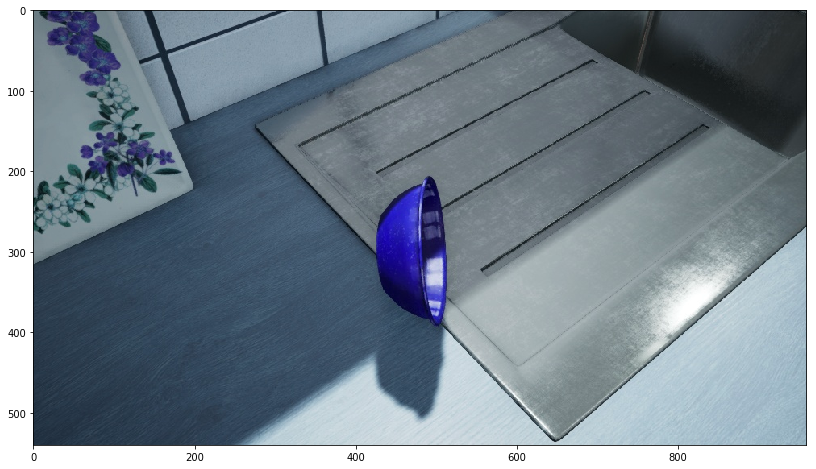

In [7]:
scene = Scene('./fat/single/024_bowl_16k/kitchen_0/', 0)

img = Image.fromarray(scene.left.img.copy())
plt.imshow(img); plt.show()

model_root = './fat/ycb_models_nvdu_aligned_cm/024_bowl//google_512k/'
pts = datalib.load_obj(model_root+'textured.obj')

In [8]:
opencv_to_opengl = np.float32([
    [1, 0, 0, 0],
    [0, -1, 0, 0],
    [0, 0, -1, 0],
    [0, 0, 0, 1]
])

# color uv on open3D (With pink fragments)

In [9]:
model_root_16k = './fat/ycb_models_nvdu_aligned_cm/024_bowl/google_16k/'
pts_16k = datalib.load_obj(model_root_16k+'textured.obj')

# uvmap color, 
# if bins < 256, we need to rescale, just to make it prettier
nbins = 16
u_map, v_map = uv_map.generate_uv_map(pts_16k, method='s', bins=nbins, to_256=True)
uvs = np.column_stack([u_map, v_map, np.zeros_like(u_map)])


# Add fragments center with color
frag_c, _ = fragment.fragmentation_fps(pts_16k, num_frags=16)
frag_clr = np.ones_like(frag_c) * [255, 0, 255]

pts_show = np.concatenate([pts_16k, frag_c], axis=0)
clr_show = np.concatenate([uvs, frag_clr], axis=0)

pcd = o3d.PointCloud()
pcd.points = o3d.Vector3dVector(pts_show)
pcd.colors = o3d.Vector3dVector(clr_show / 255)  # open3d need [0, 1]
pcd.transform(opencv_to_opengl @ scene.left.Tmw_list[0])

vis = o3d.JVisualizer()
vis.add_geometry(pcd)
vis.show()

JVisualizer with 1 geometries

# Map on 2D image

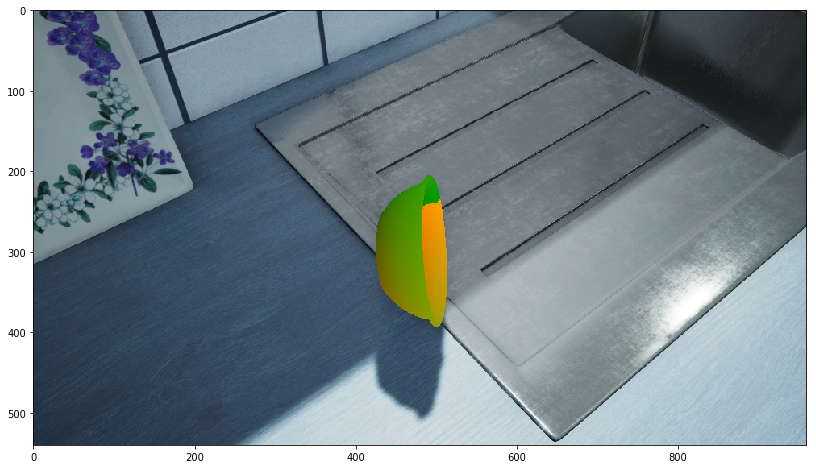

In [10]:
nbins = 256

# Get mapped coordinates
store_dict = dict(depth_sorted_ind=None)
pts_ind = scene.left.transform_point_cloud(pts, ind=0, store_dict=store_dict).astype(int)

pts_disp = pts[store_dict['depth_sorted_ind'], :]

_img = uv_map.draw_uv_map_image(pts_disp, pts_ind, scene.left.img, method='s', bins=nbins)
plt.imshow(_img)

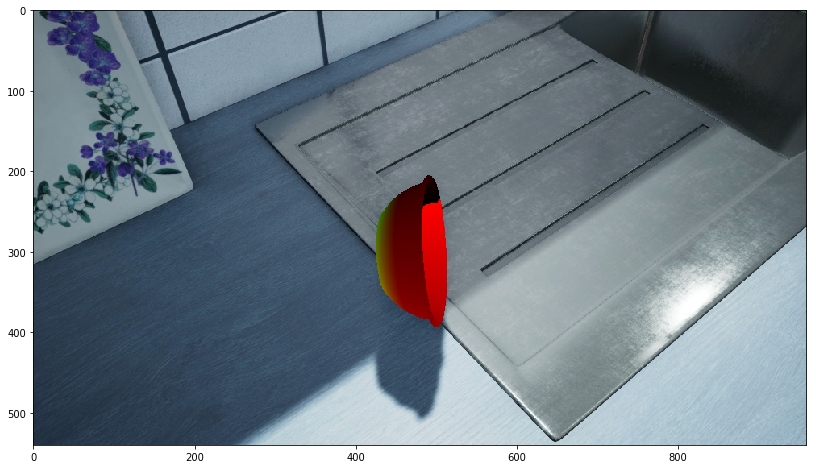

In [11]:
# Get mapped coordinates
store_dict = dict(depth_sorted_ind=None)
pts_ind = scene.left.transform_point_cloud(pts, ind=0, store_dict=store_dict).astype(int)

_img = uv_map.draw_uv_map_image(pts[store_dict['depth_sorted_ind']], pts_ind, scene.left.img, method='c')
plt.imshow(_img)

# UV Map extended With fragments

In [12]:
nbins = 5
nfrags = 3
pcd = uv_map.create_visualization_uvf_point_cloud(
    pts_16k, method='s', uv_bins=nbins, frag_bins=nfrags)
pcd.transform(opencv_to_opengl @ scene.left.Tmw_list[0])
vis = o3d.JVisualizer()
vis.add_geometry(pcd)
vis.show()

JVisualizer with 1 geometries

# Random

In [13]:
nbins = 16

single_root = './fat/single/'
mod = np.random.choice(glob.glob(os.path.join(single_root, '*')))
place = np.random.choice(glob.glob(os.path.join(mod, '*')))
num_scenes = len(glob.glob(os.path.join(place, '*.left.jpg')))
index = np.random.choice(num_scenes)

Model Name:  052_extra_large_clamp


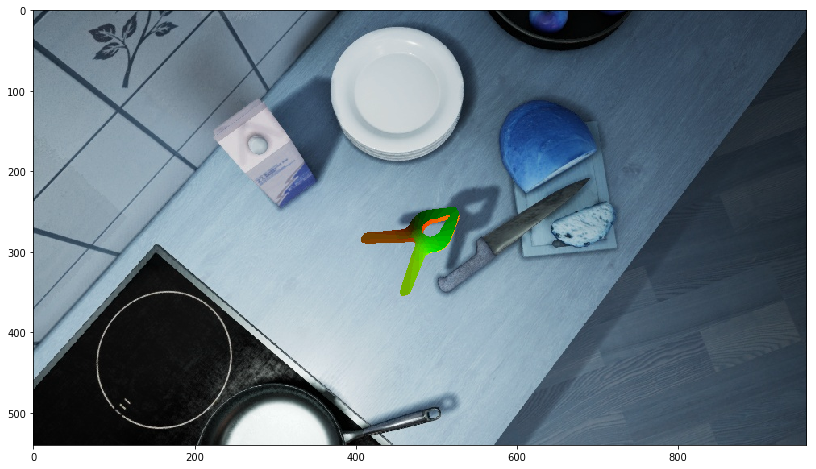

In [14]:
scene = Scene(place, index)
model_name = scene.left.objects[0]['class'].replace('_16k', '').replace('_16K', '')
# model_name = place.split('/')[-2].replace('_16k', '').replace('_16K', '')
model_root = f"./fat/ycb_models_nvdu_aligned_cm/{model_name}/google_512k/"
pts = datalib.load_obj(model_root+'textured.obj')

img = Image.fromarray(scene.left.img.copy())

# Get mapped coordinates
store_dict = dict(depth_sorted_ind=None)
pts_ind = scene.left.transform_point_cloud(pts, ind=0, store_dict=store_dict).astype(int)

_img = uv_map.draw_uv_map_image(
    pts[store_dict['depth_sorted_ind']], pts_ind, scene.left.img, method='s', bins=nbins)
print("Model Name: ", model_name)
plt.imshow(_img);
plt.show()

In [15]:
model_root_16k = f"./fat/ycb_models_nvdu_aligned_cm/{model_name}/google_16k/"
pts_16k = datalib.load_obj(model_root_16k+'textured.obj')

u_map, v_map = uv_map.generate_uv_map(pts_16k, method='s', bins=nbins, to_256=True)
uvs = np.column_stack([u_map, v_map, np.zeros_like(u_map)])

# Add fragments center with color
frag_c, _ = fragment.fragmentation_fps(pts_16k, num_frags=16)
frag_clr = np.ones_like(frag_c) * [255, 0, 255]

pts_show = np.concatenate([pts_16k, frag_c], axis=0)
clr_show = np.concatenate([uvs, frag_clr], axis=0)

pcd = o3d.PointCloud()
pcd.points = o3d.Vector3dVector(pts_show)
pcd.colors = o3d.Vector3dVector(clr_show / 255)  # open3d need [0, 1]
pcd.transform(opencv_to_opengl @ scene.left.Tmw_list[0])

vis = o3d.JVisualizer()
vis.add_geometry(pcd)
vis.show()

JVisualizer with 1 geometries

# Random Mixed

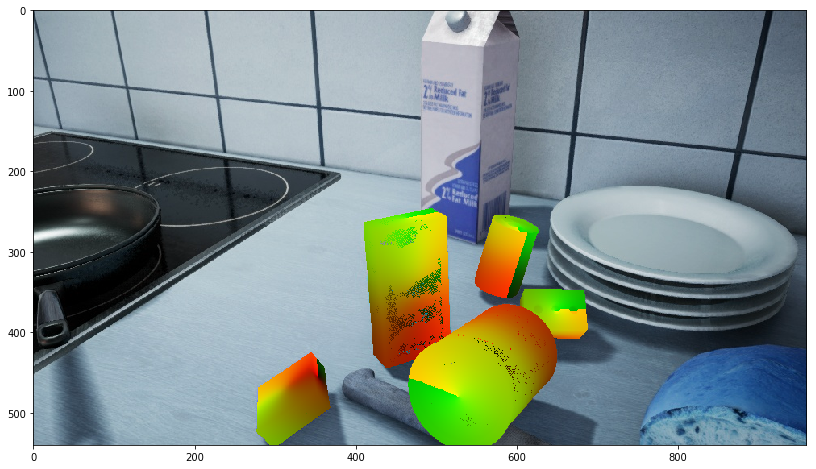

In [16]:
mixed_root = './fat/mixed'
place = np.random.choice(glob.glob(os.path.join(mixed_root, '*')))
num_scenes = len(glob.glob(os.path.join(place, '*.left.jpg')))
index = np.random.choice(num_scenes)
scene = Scene(place, index)

model_root = f"./fat/ycb_models_nvdu_aligned_cm/"
_img = uv_map.draw_uv_map_side(scene.left, model_root=model_root)

plt.imshow(_img); plt.show()

In [17]:
model_root_16k = f"./fat/ycb_models_nvdu_aligned_cm/{model_name}/google_16k/"
pts_16k = datalib.load_obj(model_root_16k+'textured.obj')

u_map, v_map = uv_map.generate_uv_map(pts_16k, method='s', bins=nbins, to_256=True)
uvs = np.column_stack([u_map, v_map, np.zeros_like(u_map)])

# Add fragments center with color
frag_c, _ = fragment.fragmentation_fps(pts_16k, num_frags=16)
frag_clr = np.ones_like(frag_c) * [255, 0, 255]

pts_show = np.concatenate([pts_16k, frag_c], axis=0)
clr_show = np.concatenate([uvs, frag_clr], axis=0)

pcd = o3d.PointCloud()
pcd.points = o3d.Vector3dVector(pts_show)
pcd.colors = o3d.Vector3dVector(clr_show / 255)  # open3d need [0, 1]
pcd.transform(opencv_to_opengl @ scene.left.Tmw_list[obj_ind])

vis = o3d.JVisualizer()
vis.add_geometry(pcd)
vis.show()

NameError: name 'obj_ind' is not defined